In [82]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict


In [83]:
class BatsmanState(TypedDict):
    runs: int
    balls: int
    fours: int
    sixes: int

    sr: float
    bpb: float
    boundary_percent: float
    summery: str

In [84]:
def calculate_sr(state):
    sr =(state['runs'] / state['balls']) * 100
    
    return {'sr': sr}

In [85]:
def calculate_bpb(state):
    bpb = state['balls'] / ( state['fours'] + state['sixes'])
    
    return {'bpb': bpb}

In [86]:
def calculate_boundary_percent(state):
    cbp = ((state['fours']*4)+(state['sixes']*6)) /(state['runs'])*100
    
    return {'boundary_percent': cbp}

In [87]:
def gen_summery(state):
    summery = f"""
    Balls: {state['balls']}
    Runs: {state['runs']}
    SR: {state['sr']}
    Ball Per Boundary: {state['bpb']}
    Boundary_Percent: {state['boundary_percent']}
    """
    state['summery'] = summery
    return state

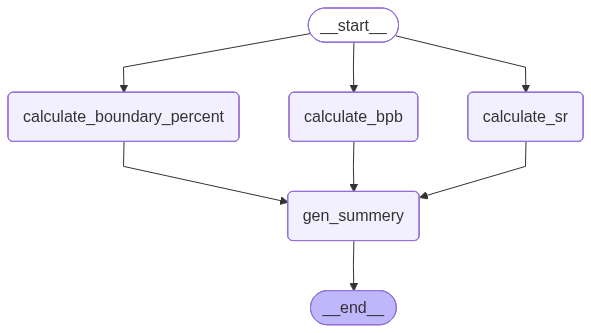

In [88]:
graph = StateGraph(BatsmanState)

graph.add_node('calculate_sr', calculate_sr)
graph.add_node('calculate_bpb', calculate_bpb)
graph.add_node('calculate_boundary_percent', calculate_boundary_percent)
graph.add_node('gen_summery', gen_summery)


graph.add_edge(START, 'calculate_sr')
graph.add_edge(START, 'calculate_bpb')
graph.add_edge(START, 'calculate_boundary_percent')

graph.add_edge('calculate_sr', 'gen_summery')
graph.add_edge('calculate_bpb', 'gen_summery')
graph.add_edge('calculate_boundary_percent', 'gen_summery')

graph.add_edge('gen_summery', END)


workflow = graph.compile()
workflow

In [90]:
initial_state = {'runs':264 ,'balls':173, 'fours':33, 'sixes':9}
final_state = workflow.invoke(initial_state)
final_state

{'runs': 264,
 'balls': 173,
 'fours': 33,
 'sixes': 9,
 'sr': 152.60115606936415,
 'bpb': 4.119047619047619,
 'boundary_percent': 70.45454545454545,
 'summery': '\n    Balls: 173\n    Runs: 264\n    SR: 152.60115606936415\n    Ball Per Boundary: 4.119047619047619\n    Boundary_Percent: 70.45454545454545\n    '}